In [2]:
import numpy as np
import pandas as pd
import torch
from IPython.display import clear_output
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

## Напишем модель нашей нейросети

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# download and transform train dataset
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../mnist_data', 
                                                          download=True, 
                                                          train=True,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                              transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                          ])), 
                                           batch_size=10, 
                                           shuffle=True)

# download and transform test dataset
test_loader = torch.utils.data.DataLoader(datasets.MNIST('../mnist_data', 
                                                          download=True, 
                                                          train=False,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                              transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                          ])), 
                                           batch_size=10, 
                                           shuffle=True)




class CNNClassifier(nn.Module):
    """Custom module for a simple convnet classifier"""
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    
    def forward(self, x):
        # input is 28x28x1
        # conv1(kernel=5, filters=10) 28x28x10 -> 24x24x10
        # max_pool(kernel=2) 24x24x10 -> 12x12x10
        
        # Do not be afraid of F's - those are just functional wrappers for modules form nn package
        # Please, see for yourself - http://pytorch.org/docs/_modules/torch/nn/functional.html
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        
        # conv2(kernel=5, filters=20) 12x12x20 -> 8x8x20
        # max_pool(kernel=2) 8x8x20 -> 4x4x20
        x = F.relu(F.max_pool2d(self.dropout(self.conv2(x)), 2))
        
        # flatten 4x4x20 = 320
        x = x.view(-1, 320)
        
        # 320 -> 50
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        
        # 50 -> 10
        x = self.fc2(x)
        
        # transform to logits
        return F.log_softmax(x)

# create classifier and optimizer objects
clf = CNNClassifier()
opt = torch.optim.Adam(clf.parameters(), lr=1e-3)

loss_history = []
acc_history = []
avg_loss = []

def train(epoch):
    clf.train() # set model in training mode (need this because of dropout)
    
    # dataset API gives us pythonic batching 
    for batch_id, (data, label) in enumerate(train_loader):
        data = Variable(data)
        target = Variable(label)
        
        # forward pass, calculate loss and backprop!
        opt.zero_grad()
        preds = clf(data)
        loss = F.nll_loss(preds, target)
        loss.backward()
        loss_history.append(loss.data[0])
        opt.step()
        
        if batch_id % 100 == 0:
            print(loss.data[0])

def test(epoch):
    clf.eval() # set model in inference mode (need this because of dropout)
    test_loss = 0
    correct = 0
    
    for data, target in test_loader:
        data = Variable(data, volatile=True) 
        target = Variable(target)
        
        output = clf(data)
        test_loss += F.nll_loss(output, target).data[0]
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()

    test_loss = test_loss
    test_loss /= len(test_loader) # loss function already averages over batch size
    accuracy = 100. * correct / len(test_loader.dataset)
    acc_history.append(accuracy)
    avg_loss.append(test_loss)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        accuracy))

for epoch in range(0, 10):
    print("Epoch %d" % epoch)
    train(epoch)
    test(epoch)

Epoch 0
tensor(2.4586)


/Users/tomininvladislav/env/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/Users/tomininvladislav/env/lib/python3.6/site-packages/ipykernel_launcher.py:90: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/Users/tomininvladislav/env/lib/python3.6/site-packages/ipykernel_launcher.py:94: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


tensor(1.7086)
tensor(0.5826)
tensor(0.2692)
tensor(0.2487)
tensor(0.4166)
tensor(0.5672)
tensor(0.5756)
tensor(0.6888)
tensor(0.6057)
tensor(0.5696)
tensor(0.2001)
tensor(0.3525)
tensor(0.4945)
tensor(0.2618)
tensor(0.5547)
tensor(0.7051)
tensor(0.2723)
tensor(0.1821)
tensor(0.1595)
tensor(0.1177)
tensor(0.3860)
tensor(1.4795)
tensor(0.2476)
tensor(0.5320)
tensor(0.0635)
tensor(0.3147)
tensor(0.1732)
tensor(0.1785)
tensor(0.3657)
tensor(0.0507)
tensor(0.7144)
tensor(1.2825)
tensor(0.1025)
tensor(0.1407)
tensor(0.1856)
tensor(0.3272)
tensor(0.2267)
tensor(0.3201)
tensor(0.4373)
tensor(0.3322)
tensor(0.3937)
tensor(0.6058)
tensor(0.5727)
tensor(0.0127)
tensor(0.5363)
tensor(0.1845)
tensor(0.0272)
tensor(0.3691)
tensor(0.2913)
tensor(0.0427)
tensor(0.5855)
tensor(0.9825)
tensor(0.1314)
tensor(0.0227)
tensor(0.1730)
tensor(0.1166)
tensor(0.0372)
tensor(0.2356)
tensor(0.0754)


/Users/tomininvladislav/env/lib/python3.6/site-packages/ipykernel_launcher.py:102: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/Users/tomininvladislav/env/lib/python3.6/site-packages/ipykernel_launcher.py:106: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 0.0808, Accuracy: 9754/10000 (97%)

Epoch 1
tensor(0.5011)
tensor(0.1081)
tensor(0.1593)
tensor(0.0023)
tensor(0.3648)
tensor(0.3286)
tensor(0.0283)
tensor(0.2335)
tensor(0.2880)
tensor(0.1459)
tensor(0.1050)
tensor(0.4812)
tensor(0.2546)
tensor(0.3647)
tensor(0.0491)
tensor(0.0793)
tensor(0.1642)
tensor(0.0647)
tensor(0.0013)
tensor(0.0918)
tensor(0.1254)
tensor(0.0339)
tensor(0.0185)
tensor(0.0365)
tensor(0.0057)
tensor(0.2250)
tensor(0.6726)
tensor(0.0396)
tensor(0.0958)
tensor(0.2006)
tensor(0.0689)
tensor(0.0423)
tensor(0.5617)
tensor(0.6247)
tensor(0.0840)
tensor(0.5270)
tensor(0.2182)
tensor(0.2125)
tensor(0.4093)
tensor(0.0545)
tensor(0.3090)
tensor(0.0246)
tensor(0.0470)
tensor(0.3542)
tensor(0.0378)
tensor(0.5692)
tensor(0.2637)
tensor(0.2449)
tensor(0.0664)
tensor(0.0280)
tensor(0.5333)
tensor(0.3940)
tensor(0.1393)
tensor(0.0783)
tensor(0.0213)
tensor(0.0043)
tensor(0.7582)
tensor(0.2603)
tensor(0.0836)
tensor(0.0444)

Test set: Average loss: 0.0592

tensor(0.0042)
tensor(0.5861)
tensor(0.0866)
tensor(0.1000)
tensor(0.0407)
tensor(0.2220)
tensor(0.0571)
tensor(0.0248)
tensor(0.5344)
tensor(0.0242)
tensor(0.0153)
tensor(0.1869)
tensor(0.0102)
tensor(0.2262)
tensor(0.1935)
tensor(0.0121)
tensor(0.4245)
tensor(0.4803)
tensor(0.0650)
tensor(1.5459)
tensor(0.3217)
tensor(0.0521)
tensor(0.0113)
tensor(0.7782)
tensor(0.1123)
tensor(0.1777)
tensor(0.1091)
tensor(0.1289)
tensor(0.0200)
tensor(0.0901)
tensor(0.0012)
tensor(0.0150)
tensor(0.0195)
tensor(0.0145)
tensor(0.2845)

Test set: Average loss: 0.0430, Accuracy: 9870/10000 (98%)



Text(0.5,1,'Loss (iteration)')

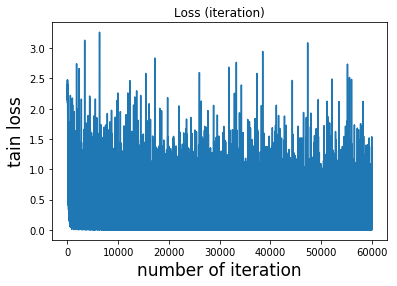

In [33]:
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel("number of iteration", fontsize = 17)
plt.ylabel("tain loss", fontsize = 17)
plt.title("Loss (iteration)")

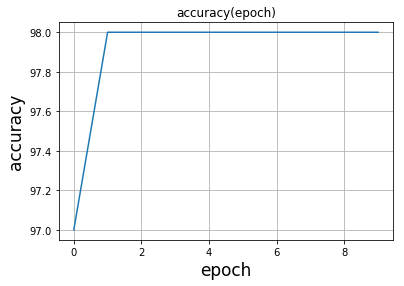

In [34]:
plt.plot(range(len(acc_history)), acc_history)
plt.xlabel("epoch", fontsize = 17)
plt.ylabel("accuracy", fontsize = 17)
plt.title("accuracy(epoch)")
plt.grid(True)

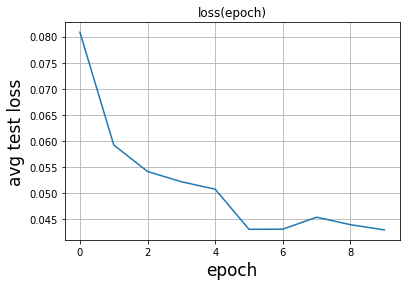

In [35]:
plt.plot(range(len(avg_loss)), avg_loss)
plt.xlabel("epoch", fontsize = 17)
plt.ylabel("avg test loss", fontsize = 17)
plt.title("loss(epoch)")
plt.grid(True)

## Теперь добавим в наши данные шум

In [47]:
accuracy_final = []
def MonitoringAccuracy(disp):
    # create classifier and optimizer objects
    clf = CNNClassifier()
    opt = torch.optim.Adam(clf.parameters(), lr=1e-3)



    loss_history = []
    acc_history = []
    avg_loss = []

    def train(epoch, disp):
        clf.train() # set model in training mode (need this because of dropout)

        # dataset API gives us pythonic batching 
        for batch_id, (data, label) in enumerate(train_loader):
            data = Variable(data + torch.Tensor(np.random.normal(0,disp, [10, 1, 28, 28])))
            target = Variable(label)

            # forward pass, calculate loss and backprop!
            opt.zero_grad()
            preds = clf(data)
            loss = F.nll_loss(preds, target)
            loss.backward()
            loss_history.append(loss.data[0])
            opt.step()

            if batch_id % 100 == 0:
                print(loss.data[0])

    def test(epoch):
        clf.eval() # set model in inference mode (need this because of dropout)
        test_loss = 0
        correct = 0

        for data, target in test_loader:
            data = Variable(data, volatile=True) 
            target = Variable(target)

            output = clf(data)
            test_loss += F.nll_loss(output, target).data[0]
            pred = output.data.max(1)[1] # get the index of the max log-probability
            correct += pred.eq(target.data).cpu().sum()

        test_loss = test_loss
        test_loss /= len(test_loader) # loss function already averages over batch size
        accuracy = 100. * correct / len(test_loader.dataset)
        acc_history.append(accuracy)
        avg_loss.append(test_loss)
        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            accuracy))
        accuracy_final.append(accuracy)

    for epoch in range(0, 1):
        train(epoch,disp)
        test(epoch)
    
for disp in np.linspace(0, 10, 10):
    MonitoringAccuracy(disp)


/Users/tomininvladislav/env/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/Users/tomininvladislav/env/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/Users/tomininvladislav/env/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


tensor(2.3043)
tensor(1.9872)
tensor(1.6060)
tensor(0.7386)
tensor(0.8171)
tensor(0.5953)
tensor(0.6926)
tensor(0.2747)
tensor(0.2679)
tensor(1.1111)
tensor(0.3211)
tensor(0.1784)
tensor(0.3896)
tensor(0.5361)
tensor(0.4876)
tensor(0.1343)
tensor(0.7784)
tensor(0.0915)
tensor(0.0609)
tensor(0.3252)
tensor(0.2540)
tensor(0.1344)
tensor(1.8978)
tensor(0.0747)
tensor(0.1236)
tensor(0.1614)
tensor(0.3952)
tensor(0.4646)
tensor(0.7779)
tensor(0.7010)
tensor(0.4817)
tensor(0.0347)
tensor(0.5327)
tensor(0.4109)
tensor(0.4489)
tensor(0.1911)
tensor(1.7798)
tensor(0.4198)
tensor(0.2628)
tensor(0.0972)
tensor(0.1134)
tensor(0.0833)
tensor(0.1923)
tensor(0.2487)
tensor(0.1231)
tensor(0.9556)
tensor(0.2313)
tensor(0.0149)
tensor(0.5682)
tensor(0.0633)
tensor(0.3155)
tensor(0.6313)
tensor(0.1329)
tensor(0.0938)
tensor(0.2915)
tensor(0.5344)
tensor(0.0352)
tensor(0.6538)
tensor(0.0555)
tensor(0.0240)


/Users/tomininvladislav/env/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/Users/tomininvladislav/env/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 0.0784, Accuracy: 9761/10000 (97%)

tensor(2.3532)
tensor(2.0452)
tensor(1.0761)
tensor(0.5852)
tensor(1.0204)
tensor(0.6283)
tensor(0.4834)
tensor(1.1529)
tensor(0.5052)
tensor(0.3921)
tensor(1.3586)
tensor(0.4793)
tensor(1.4567)
tensor(0.7758)
tensor(0.8992)
tensor(0.6025)
tensor(0.7153)
tensor(0.5562)
tensor(1.1504)
tensor(0.2448)
tensor(0.9506)
tensor(1.2470)
tensor(0.1711)
tensor(0.2481)
tensor(0.6830)
tensor(0.3502)
tensor(0.5139)
tensor(0.5422)
tensor(0.7124)
tensor(0.3073)
tensor(0.5131)
tensor(0.2495)
tensor(0.1383)
tensor(0.3369)
tensor(0.2157)
tensor(0.2084)
tensor(1.2748)
tensor(0.7956)
tensor(0.1484)
tensor(0.2741)
tensor(0.1104)
tensor(0.8630)
tensor(0.4463)
tensor(0.1398)
tensor(0.3714)
tensor(0.4061)
tensor(0.5439)
tensor(0.2552)
tensor(0.0289)
tensor(1.4360)
tensor(0.2907)
tensor(0.5284)
tensor(0.5968)
tensor(0.1964)
tensor(0.4730)
tensor(0.1241)
tensor(1.4166)
tensor(0.1826)
tensor(0.3955)
tensor(0.3469)

Test set: Average loss: 0.1223, Accura

tensor(2.3122)
tensor(2.2955)
tensor(2.3077)
tensor(2.2907)
tensor(2.2714)
tensor(2.2687)
tensor(2.3020)
tensor(2.2990)
tensor(2.2970)
tensor(2.2923)
tensor(2.3147)
tensor(2.3139)
tensor(2.2859)
tensor(2.3175)
tensor(2.2891)
tensor(2.2714)
tensor(2.3520)
tensor(2.3051)
tensor(2.2716)
tensor(2.3148)
tensor(2.2954)
tensor(2.2872)
tensor(2.3245)
tensor(2.3141)
tensor(2.3162)
tensor(2.3141)
tensor(2.3017)
tensor(2.3204)
tensor(2.2856)
tensor(2.2954)

Test set: Average loss: 2.3013, Accuracy: 1135/10000 (11%)



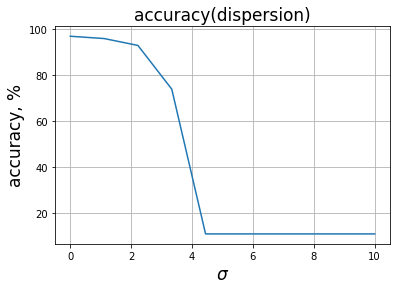

In [51]:
plt.plot(np.linspace(0, 10, 10), accuracy_final)
plt.xlabel("$\sigma$", fontsize = 17)
plt.ylabel("accuracy, %", fontsize = 17)
plt.title("accuracy(dispersion)", fontsize = 17)
plt.grid(True)